# Сбор текстовых данных

Первый этап любой работы с данными - это их сбор. Тут возможны варианты в зависимости от ситуации и от глобальной задачи. Три общих подхода к сбору данных на Python:
1. скрейпинг, т.е. извлечение данных с веб-страниц
2. парсинг данных по API
3. использование уже написанных библиотек
4. сбор собственного корпуса вручную

## Библиотеки Python для веб-скрейпинга

### urllib



> Библиотека `urllib` позволяет извлекать текст с html-страницы. Рассмотрим простой пример: выгрузим новость с сайта Гринписа вот по этой ссылочке - https://greenpeace.ru/news/2021/01/14/vlasti-francii-otvetjat-v-sude-za-klimaticheskoe-bezdejstvie/.



In [ ]:
url1 = "https://greenpeace.ru/news/2021/01/14/vlasti-francii-otvetjat-v-sude-za-klimaticheskoe-bezdejstvie/"

In [ ]:
from urllib.request import urlopen

In [ ]:
with urlopen(url1) as response:
    for line in response:
        print(line)

b'<!DOCTYPE html>\n'
b'<html class="color-scheme-base_light" data-layout="row" lang="ru">\n'
b'    <head>\n'
b'\n'
b'        <meta charset="UTF-8">\n'
b'\t\t<meta name="theme-color" content="#66\xd1\x81\xd1\x8100"/>\n'
b'        <meta name="viewport" content="width=device-width, initial-scale=1.0">\n'
b'        <link rel="profile" href="http://gmpg.org/xfn/11">\n'
b'\t\t<meta name="googlebot" content="all">\n'
b'\t\t<meta name="googlebot-news" content="all">\n'
b'\t\t<meta name="google-site-verification" content="d_z0H5IUA8Tqd-n6Ml983KPwdvYqEVGlpnbStVrgaCY" />\n'
b'\t\t<link rel="alternate" href="https://greenpeace.ru" hreflang="ru-ru" />\n'
b'\t    <meta name="referrer" content="no-referrer-when-downgrade" />\n'
b'\t<meta property="og:image" content=""/>\n'
b'\t<meta property="og:title" content="\xd0\x92\xd0\xbb\xd0\xb0\xd1\x81\xd1\x82\xd0\xb8 \xd0\xa4\xd1\x80\xd0\xb0\xd0\xbd\xd1\x86\xd0\xb8\xd0\xb8 \xd0\xbe\xd1\x82\xd0\xb2\xd0\xb5\xd1\x82\xd1\x8f\xd1\x82 \xd0\xb2 \xd1\x81\xd1\x83\xd0

Мы извлекли исходный html-код страницы, но прочитать это совершенно невозможно. Нужно декодировать текст.

In [ ]:
with urlopen(url1) as response:
    for line in response:
        line = line.decode("utf-8")
        print(line)

<!DOCTYPE html>

<html class="color-scheme-base_light" data-layout="row" lang="ru">

    <head>



        <meta charset="UTF-8">

		<meta name="theme-color" content="#66сс00"/>

        <meta name="viewport" content="width=device-width, initial-scale=1.0">

        <link rel="profile" href="http://gmpg.org/xfn/11">

		<meta name="googlebot" content="all">

		<meta name="googlebot-news" content="all">

		<meta name="google-site-verification" content="d_z0H5IUA8Tqd-n6Ml983KPwdvYqEVGlpnbStVrgaCY" />

		<link rel="alternate" href="https://greenpeace.ru" hreflang="ru-ru" />

	    <meta name="referrer" content="no-referrer-when-downgrade" />

	<meta property="og:image" content=""/>

	<meta property="og:title" content="Власти Франции ответят в суде за климатическое бездействие"/>

	<meta name="description" property="og:description"	content="Сегодня состоялось слушание дела. Требование поддержало более двух миллионов французов." />





        <title>Власти Франции ответят в суде за климатич

Отфильтруем нужный текст.

In [ ]:
with urlopen(url1) as response:
    for line in response:
        line = line.decode("utf-8")
        if "</h2>" in line and "Другие новости" not in line:
            line = line.replace('</h2>', '').strip()
            print(f"Title: {line}")
        if '<p><span style="font-weight: 400;">' in line:
            templates = ('<span style="font-weight: 400;">', "</span>", "<p>", "</p>")
            for template in templates:
                if template in line:
                    line = line.replace(template, '').strip()
            print(line)

Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, причинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений. Соответствующий иск подали ещё два года назад из-за бездействия государства в решении проблемы климатического кризиса. Сегодня состоялось слушание дела в суде Парижа, решение по которому будет вынесено в течение двух недель.&nbsp;
Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были побиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер. Выбросы парниковых газов в течение последних пяти лет продолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом. В декабре прошлого года Высший совет по климату (независимый орган, созданный в 2018 году и состоящий из экспертов по климату) проанализировал, что две трети плана стимулирования не работаю

Обо всех возможностях библиотеки `urllib` и примерах можно почитать в [документации](https://docs.python.org/3/library/urllib.request.html#module-urllib.request).

### beautifulsoup4


> beautifulsoup4 тоже собирает данные по адресу странички, но позволяет сделать это чисто и красиво значительно проще. Посмотрим на том же примере с новостью Гринписа.



In [ ]:
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
page = requests.get(url1)
soup = bs(page.text, "html.parser")
soup

<!DOCTYPE html>

<html class="color-scheme-base_light" data-layout="row" lang="ru">
<head>
<meta charset="utf-8"/>
<meta content="#66сс00" name="theme-color">
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<meta content="all" name="googlebot"/>
<meta content="all" name="googlebot-news"/>
<meta content="d_z0H5IUA8Tqd-n6Ml983KPwdvYqEVGlpnbStVrgaCY" name="google-site-verification">
<link href="https://greenpeace.ru" hreflang="ru-ru" rel="alternate">
<meta content="no-referrer-when-downgrade" name="referrer">
<meta content="" property="og:image">
<meta content="Власти Франции ответят в суде за климатическое бездействие" property="og:title"/>
<meta content="Сегодня состоялось слушание дела. Требование поддержало более двух миллионов французов." name="description" property="og:description"/>
<title>Власти Франции ответят в суде за климатическое бездействие</title>
<link href="//fonts.googleapis.com" rel="dns-prefetc

In [ ]:
title = soup.find("h1", {"class": "padding-top-30 padding-bottom-10 site-typeface-title typo-size-xlarge post-title"})
print(f"Title: {title.text.strip()}")

Title: Власти Франции ответят в суде за климатическое бездействие


In [ ]:
paragraphs_soup = soup.findAll("span", {"style": "font-weight: 400;"})
paragraphs_soup

[<span style="font-weight: 400;">Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, причинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений. Соответствующий иск подали ещё два года назад из-за бездействия государства в решении проблемы климатического кризиса. Сегодня состоялось слушание дела в суде Парижа, решение по которому будет вынесено в течение двух недель. </span>,
 <span style="font-weight: 400;">Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были побиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер. Выбросы парниковых газов в течение последних пяти лет продолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом. В декабре прошлого года Высший совет по климату (независимый орган, созданный в 2018 году и состоящий из экспертов по кл

In [ ]:
content = "".join([item.text.strip() for item in paragraphs_soup])
print(f"Content: {content}")

Content: Greenpeace Франции совместно с другими НКО (Notre Affaire à Tous, Фонд Николя Юло и Oxfam France) требуют от властей возместить ущерб, причинённый гражданам страны из-за политики в области экологии и начать активные действия в рамках предыдущих соглашений. Соответствующий иск подали ещё два года назад из-за бездействия государства в решении проблемы климатического кризиса. Сегодня состоялось слушание дела в суде Парижа, решение по которому будет вынесено в течение двух недель.Хотя климатический кризис остаётся одной из главных проблем для французов (в 2020 году были побиты новые температурные рекорды), государство продолжает откладывать принятие необходимых мер. Выбросы парниковых газов в течение последних пяти лет продолжали снижаться вдвое медленнее, чем показатели, предусмотренные законом. В декабре прошлого года Высший совет по климату (независимый орган, созданный в 2018 году и состоящий из экспертов по климату) проанализировал, что две трети плана стимулирования не работ

Для более сложных случаев `bs4` имеет массу полезных методов, о которых при необходимости можно прочитать в [документации с примерами](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

## Библиотеки для сбора данных с конкретных ресурсов

### wikipedia-API

> Разумеется, с Википедии можно собрать данные обычным скрейпингом, например, с помощью `bs4`, но можно сделать это куда проще, воспользовавшись уже придуманной для нашей цели библиотекой.

Посмотрим, что можно собрать из Википедии по Гринпису.


In [ ]:
!pip install wikipedia-api

  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-py3-none-any.whl size=13477 sha256=02e79bb018ba8e1c4854a6f49cf3dec5576572c742a1109746003b2edad07916
  Stored in directory: /root/.cache/pip/wheels/d3/24/56/58ba93cf78be162451144e7a9889603f437976ef1ae7013d04
Successfully built wikipedia-api


In [ ]:
import wikipediaapi as wikiapi

In [ ]:
wiki = wikiapi.Wikipedia("ru")
page = wiki.page("Гринпис")
if page.exists():
    print(page.title, page.text, sep="\n")

Гринпис
«Гринпи́с» (англ. Greenpeace — «зелёный мир») — международная независимая неправительственная экологическая организация, созданная в 1971 году в Канаде.
В поле зрения организации находятся такие проблемы, как глобальное изменение климата, сокращение площади лесов от тропиков до Арктики и Антарктики, чрезмерный вылов рыбы, коммерческий китобойный промысел, радиационная опасность, развитие возобновляемых источников энергии и ресурсосбережение, загрязнение окружающей среды опасными химическими веществами, устойчивое сельское хозяйство, сохранение Арктики.

Организационная структура
Национальные и региональные организации (НРО) работают самостоятельно, руководствуясь общими принципами и миссией «Гринпис».
Для координации международной работы в 80-х годах национальные организации создали «Гринпис Интернэшнл» (Амстердам, Нидерланды), во главе которого стоит Общее собрание членов.
В 2016 году были выбраны два исполнительных директора Bunny McDiarmid и Jennifer Morgan. Председатель меж

In [ ]:
if page.exists():
    print(page.summary, sep="\n")

«Гринпи́с» (англ. Greenpeace — «зелёный мир») — международная независимая неправительственная экологическая организация, созданная в 1971 году в Канаде.
В поле зрения организации находятся такие проблемы, как глобальное изменение климата, сокращение площади лесов от тропиков до Арктики и Антарктики, чрезмерный вылов рыбы, коммерческий китобойный промысел, радиационная опасность, развитие возобновляемых источников энергии и ресурсосбережение, загрязнение окружающей среды опасными химическими веществами, устойчивое сельское хозяйство, сохранение Арктики.


Но нам нужен только значащий текст, т.е. "См.также" и далее в конце хотелось бы исключить. Для этого можно просмотреть всю страничку по секциям.

In [ ]:
def extra_index(sections, first_extra):
  for i in range(len(sections)):
    if first_extra in str(sections[i]):
      return i
  return None

In [ ]:
extra = "См. также"
page_sections = page.sections
text = "".join([section.text for section in page_sections[:extra_index(page_sections, extra)]])
text

'Национальные и региональные организации (НРО) работают самостоятельно, руководствуясь общими принципами и миссией «Гринпис».\nДля координации международной работы в 80-х годах национальные организации создали «Гринпис Интернэшнл» (Амстердам, Нидерланды), во главе которого стоит Общее собрание членов.\nВ 2016 году были выбраны два исполнительных директора Bunny McDiarmid и Jennifer Morgan. Председатель международного совета директоров организации — Ана Тони (с 2011 года).В конце 1960-х годов у США были планы на подземные ядерные испытания в тектонически неустойчивом районе близ острова Амчитка в Аляске. Из-за землетрясения 1964 года на Аляске эти планы вызывали обеспокоенность повторения землетрясения или даже возможность вызвать цунами. Противники ядерных испытаний проводили протесты на границе США и Канады. Протесты не остановили планы США по испытанию ядерного оружия. Хотя ни землетрясения, ни цунами так и не случилось, протесты усилились, когда США объявили, что собираются взорвать

Также можно вытащить все ссылки со странички, если хочется прямо из текста статьи перейти близкую по теме статью.

In [ ]:
links = page.links
for title in sorted(links.keys()):
    print(links[title])

Arctic Sunrise (id: ??, ns: 0)
Brent Spar (id: ??, ns: 0)
British Petroleum (id: ??, ns: 0)
Cairn Energy (id: ??, ns: 0)
Dorothy Stowe (id: ??, ns: 0)
Eurythmics (id: ??, ns: 0)
ExxonMobil (id: ??, ns: 0)
Facebook (id: ??, ns: 0)
Gemeinsame Normdatei (id: ??, ns: 0)
Greenpeace (значения) (id: ??, ns: 0)
Greenpeace Breakthrough (id: ??, ns: 0)
INXS (id: ??, ns: 0)
IPhone (id: ??, ns: 0)
Irving Stowe (id: ??, ns: 0)
Jim Bohlen (id: ??, ns: 0)
Microsoft Academic (id: ??, ns: 0)
NUKAT (id: ??, ns: 0)
OSPAR (id: ??, ns: 0)
R.E.M. (id: ??, ns: 0)
Rainbow Warrior (id: ??, ns: 0)
Restriction of Hazardous Substances Directive (id: ??, ns: 0)
Royal Dutch Shell (id: ??, ns: 0)
U2 (id: ??, ns: 0)
VIAF (id: ??, ns: 0)
Wayback Machine (id: ??, ns: 0)
WorldCat (id: ??, ns: 0)
YouTube (id: ??, ns: 0)
АК-74 (id: ??, ns: 0)
Актиноиды в природе (id: ??, ns: 0)
Альтернативная энергетика (id: ??, ns: 0)
Аляска (id: ??, ns: 0)
Амстердам (id: ??, ns: 0)
Амчитка (id: ??, ns: 0)
Английский язык (id: ??, ns: 0)

Помимо перечисленного, можно также собирать информацию о категориях или прямые ссылки на статьи. Документацию библиотеки с дополнительными примерами можно найти [тут](https://wikipedia-api.readthedocs.io/en/latest/wikipediaapi/api.html) и [тут](https://pypi.org/project/Wikipedia-API/). 

# Упражнение 1 Скрейпинг

На сайте https://itmo.ru/ru/personlist/personalii.htm есть информация обо всех сотрудниках ИТМО. Например, вот так



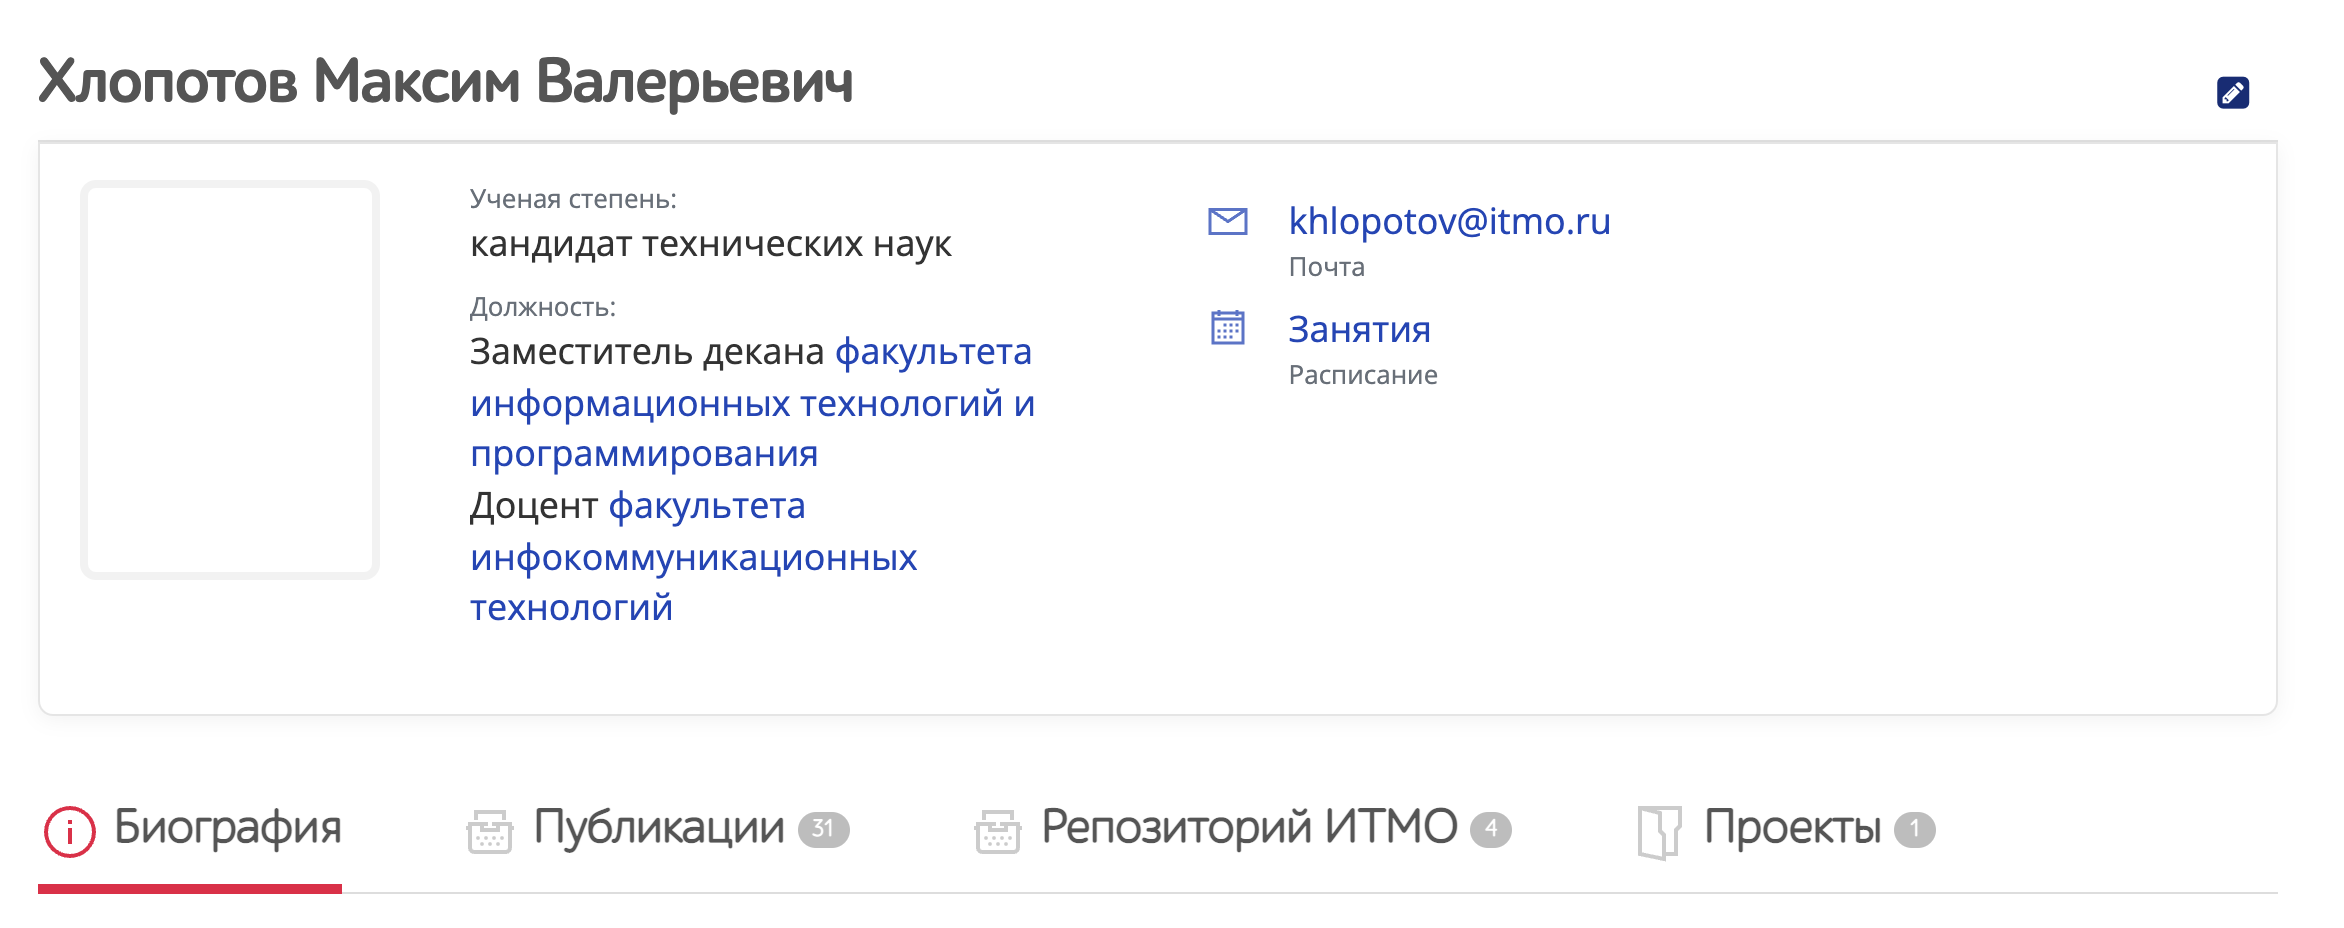

* Напишите код, который подзволяет найти всез сотрудников, у которых 2 и более должностей. 
* Какое количество должностей у сотрудника максимальное?
* Напишите код, который считает количество сотрудников с ученой степенью.
* Какие бывают ученые степени?
* Постройте график: количество публикаций - количество сотрудников.
* Есть ли зависимость между наличием ученой степени и количеством публикаций?

Упражнение 1

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
from matplotlib import pyplot as plt

In [ ]:
url = 'http://s2453847756.torrent-igra.net/'
pageInit = bs(requests.get(url).text, "html.parser")
baseUrl = 'https://itmo.ru'

In [ ]:
class Employee :
   def __init__(self):
        self.link = None
        self.name = None
        self.degree = None
        self.status = []
        self.publications = 0

In [ ]:
allEmployees = []

In [ ]:
def getLinksForLetters():
  pages = pageInit.find("ul", {"class": "nav nav-pills abcd"}).find_all("li")
  for i in range(len(pages)):
    pages[i] = baseUrl + pages[i].find('a')['href']
  return pages

In [ ]:
getLinksForLetters()

['https://itmo.ru/ru/personlist/192/letter_192.htm',
 'https://itmo.ru/ru/personlist/193/letter_193.htm',
 'https://itmo.ru/ru/personlist/194/letter_194.htm',
 'https://itmo.ru/ru/personlist/195/letter_195.htm',
 'https://itmo.ru/ru/personlist/196/letter_196.htm',
 'https://itmo.ru/ru/personlist/197/letter_197.htm',
 'https://itmo.ru/ru/personlist/198/letter_198.htm',
 'https://itmo.ru/ru/personlist/199/letter_199.htm',
 'https://itmo.ru/ru/personlist/200/letter_200.htm',
 'https://itmo.ru/ru/personlist/202/letter_202.htm',
 'https://itmo.ru/ru/personlist/203/letter_203.htm',
 'https://itmo.ru/ru/personlist/204/letter_204.htm',
 'https://itmo.ru/ru/personlist/205/letter_205.htm',
 'https://itmo.ru/ru/personlist/206/letter_206.htm',
 'https://itmo.ru/ru/personlist/207/letter_207.htm',
 'https://itmo.ru/ru/personlist/208/letter_208.htm',
 'https://itmo.ru/ru/personlist/209/letter_209.htm',
 'https://itmo.ru/ru/personlist/210/letter_210.htm',
 'https://itmo.ru/ru/personlist/211/letter_211

In [ ]:
def getLinksForEmployeesFromPage(page):
  pageParsed = bs(requests.get(page).text, 'html.parser')
  employees = pageParsed.find_all('a', {'class': 'contact-pad -person-list'})
  for i in range(len(employees)):
    employees[i] = baseUrl + employees[i]['href']
  return employees

In [ ]:
getLinksForEmployeesFromPage('https://itmo.ru/ru/personlist/222/letter_222.htm')

['https://itmo.ru/ru/viewperson/2025/yuganson_andrey_nikolaevich.htm',
 'https://itmo.ru/ru/viewperson/2016/yudaeva_ekaterina_sergeevna.htm']

In [ ]:
def getEmployeeFromPage(page):
  currentEmployee = Employee()
  currentEmployee.link = page
  pageParsed = bs(requests.get(page).text, 'html.parser')
  currentEmployee.name = pageParsed.find('span', {'class': 'page-header-text'}).text
  mainInfo = pageParsed.find('main', {'class': 'main-content'})
  dg = mainInfo.find('dt', string={'Ученая степень:'})
  if dg:
    currentEmployee.degree = dg.parent.dd.text
  Kulikov = mainInfo.find('dt', string={'Должность:'})
  if Kulikov:
    st = Kulikov.parent.dd #.findAll(text=True)
    currentEmployee.status = [bs(x,'html.parser').text for x in str(st).split('<br/>')[:-1]]
  pb = mainInfo.find('a', {'aria-controls': 'publications'})
  #currentEmployee.publications = (int(pb.find('span', {'class' : 'badge'}).text)) if pb else 0
  if pb:
    currentEmployee.publications = int(pb.find('span', {'class' : 'badge'}).text)
  return currentEmployee

In [ ]:
print(getEmployeeFromPage('https://itmo.ru/ru/viewperson/93/alekseev_gennadiy_valentinovich.htm'))

In [ ]:
linksToEmployees = []
for linkToLetter in getLinksForLetters():
  for linkToEmpl in getLinksForEmployeesFromPage(linkToLetter):
    linksToEmployees.append(linkToEmpl)

In [ ]:
len(linksToEmployees)

893

In [ ]:
import math

In [ ]:
threadsN = 9
chunkN = math.ceil(len(linksToEmployees) / threadsN)
chunkN

100

In [ ]:
chunks = [linksToEmployees[i:i + chunkN] for i in range(0, len(linksToEmployees), chunkN)]
sum([len(chunk) for chunk in chunks])

893

In [ ]:
def processChunk(chunk):
  return [getEmployeeFromPage(page) for page in chunk]

In [ ]:
import multiprocessing as mp
from multiprocessing import Pool

threadsN = 9

with Pool(processes=threadsN) as pool:
  allEmployees = []
  for data in pool.imap_unordered(processChunk, chunks):
    allEmployees.extend(data)

len(allEmployees)

893

In [ ]:
maxStEmpl = Employee
maxStEmpl.status = []
emplsWithMultStatus = []
emplsWithDegree = []
degrees = set()
worksWithD = []
worksWOD = []

for i in allEmployees:
  if(i.status and len(i.status)):
    if(len(i.status) > len(maxStEmpl.status)):
      maxStEmpl = i
    if(len(i.status) > 1):
      emplsWithMultStatus.append(i)
  if(i.degree and len(i.degree)):
    emplsWithDegree.append(i)
    degrees.add(i.degree.lower())
    worksWithD.append(i.publications)
  else:
    worksWOD.append(i.publications)
  

Работники с несколькими должностями

In [ ]:
print(len(emplsWithMultStatus))
print(emplsWithMultStatus[:3])

360
[<__main__.Employee object at 0x7fe2cf444850>, <__main__.Employee object at 0x7fe2c7cb0910>, <__main__.Employee object at 0x7fe2c7cb0d90>]


Максимальное количество должностей у 1 работника

In [ ]:
print(len(maxStEmpl.status))

5


Количество работников с ученой степенью

In [ ]:
print(len(emplsWithDegree))
print(len(worksWithD))

434
434


Список уникальных ученых степеней

In [ ]:
print(degrees)

{'профессор', 'phd, физико-математические науки', 'доктор физико-математических наук', 'доктор технических наук', 'кандидат экономических наук', 'кандидат социологических наук', 'кандидат физико-математических наук', 'phd, философские науки', 'кандидат физико-математических наук, phd, физико-математические науки', 'кандидат биологических наук', 'кандидат географических наук', 'доцент', 'кандидат архитектуры', 'кандидат технических наук', 'кандидат философских наук', 'кандидат культурологии', 'кандидат медицинских наук', 'кандидат исторических наук', 'phd, технические науки', 'кандидат филологических наук', 'кандидат химических наук', 'кандидат психологических наук', 'доктор химических наук', 'старший научный сотрудник', 'кандидат педагогических наук', 'кандидат технических наук, phd, медико-биологические науки'}


График количество публикаций - количество сотрудников

<function matplotlib.pyplot.show>

<Figure size 1440x720 with 0 Axes>

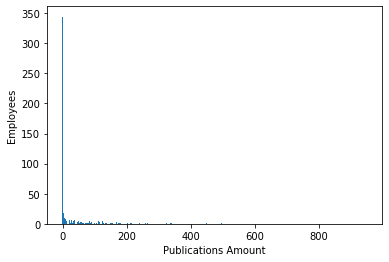

In [ ]:
d = dict()
for i in allEmployees:
  d[i.publications] = 1 if d.get(i.publications) is None else d[i.publications] + 1

plt.figure(figsize=(20, 10))
fig, ax = plt.subplots()
ax.bar(list(d.keys()), list(d.values()))
plt.ylabel('Employees')
plt.xlabel('Publications Amount')
plt.show

В среднем на 1 работника со степенью приходиться в 14 раз больше публикаций, чем на работника без степени.

In [ ]:
print((sum(worksWithD)/len(worksWithD))/(sum(worksWOD)/len(worksWOD)))

14.386116685101038
